In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import requests

import datetime as dt
# import scipy.stats as stats 
# import os
# import random
# import math
# import itertools as it

from scipy.optimize import curve_fit


In [2]:
#Settings for plotting

fs_label = 16

parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }

plt.rcParams.update(parameters)

saveplots = True
# save_loc = "figs/"
save_loc = "/home/berrig/Documents/writings_work/competing_variants/figs/"
save_formats = ["pdf", "png"]

def saveplt(save_name, saveplots=saveplots):
    if saveplots==True:
        for f in save_formats:
            plt.savefig(".".join([save_loc+save_name, f]))

# rcParams.keys()

# locale.setlocale(locale.LC_TIME, "Danish") 


In [3]:
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)


yearweek_to_date = lambda d, weekday="-1": dt.datetime.strptime(d + weekday, "%Y-%W-%w")
#this is stolen from rasmus' notebook
# yearweek_to_date = lambda x: dt.date.fromisocalendar(int(x[:4]),int(x[5:]),1)

#def getPercVar(df,country_code,variant):
#    curDF = getBestDatabase(df,country_code,variant)
#     return (curDF.Dates,curDF.percent_variant2)


# Model tests
logistic_model = lambda t, delta, p0: 1/(1+((1-p0)/p0)*np.exp(-delta*t))
lin_model = lambda t, alpha, beta: beta + alpha*t
    

In [4]:
#Error analysis:
#    probability p changes over time as a logistic.
#    the sampling of the population at any point in time is binomial as a function of p
#    the standard std of a binomial is \sigma=sqrt(Np(1-p))
std_binom = lambda p, n: np.sqrt(p*(1-p)/n)


In [5]:
url = "https://opendata.ecdc.europa.eu/covid19/virusvariant/csv/data.csv"
path=""
filename="variants_data.csv"
download_url(url, path+filename)
df = pd.read_csv(path+filename)

In [6]:
print(df.country.unique())
# print(df.variant.unique())

countries = [#'Belgium'
             #'Croatia'
             'Denmark', 
             # 'Finland', 
             # 'France', 
             # 'Germany',
             # 'Greece'
             # 'Iceland', 
             # 'Ireland', 
             # 'Italy', 
             #'Luxembourg'
             # 'Netherlands', 
             # 'Norway', 
             # 'Poland', 
             # 'Romania', 
             # 'Sweden',
             # 'spain'
            ]

#countries = list(df.country.unique())
#countries.remove('Lithuania')

# Country_codes = ["DK", "NO", "SE", "FI"] # Currently not used!

# Defining a list over all variants of interest, such that: 
    # all but the first elements constitute the variants we really want to investigate.
    # all but the last elements are the "supplementing" variant that 
    #     dominated previous to the one being investigated.
dominating_variants = ['Other', 'B.1.1.7', 'B.1.617.2']
variant_color = ["green", "blue", "red"]

variants, suppl_variants = dominating_variants[1:], dominating_variants[:-1]
nu = 1./5.

v_col = {dv:vc for dv,vc in zip(dominating_variants, variant_color)}

# Select data to plot:
#filt = (df.country.isin(countries) & df.variant.isin(variants))
#df = df[filt]

# Generate what is needed, clean out what is not
df["date"] = df.year_week.apply(yearweek_to_date)

df['percent_variant'] = np.divide(df.number_detections_variant, df.number_sequenced)
df['err_percent_variant'] = std_binom(df.percent_variant, df.number_sequenced)

df['percent_variant_adjusted'] = np.divide(df.number_detections_variant+2, df.number_sequenced+4)
df['err_percent_variant_adjusted'] = std_binom(df.percent_variant_adjusted, df.number_sequenced+4)

#df.drop(columns=["year_week", "country_code"], inplace=True)



df # .loc[(df.country=="Denmark")&(df.variant=="B.1.617.2")] #&(df.year_week=="2021-08")]

['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Malta' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden']


/usr/lib/python3/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant,date,err_percent_variant,percent_variant_adjusted,err_percent_variant_adjusted
0,Austria,AT,2020-40,GISAID,5152.0,4,0.1,Yes,AT.1,0,4.0,0.000000,2020-10-05,0.000000,0.250000,0.153093
1,Austria,AT,2020-40,GISAID,5152.0,4,0.1,Yes,AY.4.2,0,4.0,0.000000,2020-10-05,0.000000,0.250000,0.153093
2,Austria,AT,2020-40,GISAID,5152.0,4,0.1,Yes,B.1.1.529,0,4.0,0.000000,2020-10-05,0.000000,0.250000,0.153093
3,Austria,AT,2020-40,GISAID,5152.0,4,0.1,Yes,B.1.1.7,0,4.0,0.000000,2020-10-05,0.000000,0.250000,0.153093
4,Austria,AT,2020-40,GISAID,5152.0,4,0.1,Yes,B.1.1.7+E484K,0,4.0,0.000000,2020-10-05,0.000000,0.250000,0.153093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53309,Sweden,SE,2021-52,TESSy,59453.0,1500,2.5,Yes,B.1.617,0,1500.0,0.000000,2021-12-27,0.000000,0.001330,0.000940
53310,Sweden,SE,2021-52,TESSy,59453.0,1500,2.5,Yes,B.1.617.2,390,1500.0,0.260000,2021-12-27,0.011325,0.260638,0.011319
53311,Sweden,SE,2022-01,TESSy,124211.0,13,0.0,Yes,B.1.1.529,8,13.0,0.615385,2022-01-03,0.134932,0.588235,0.119365
53312,Sweden,SE,2022-01,TESSy,124211.0,13,0.0,Yes,B.1.617,0,13.0,0.000000,2022-01-03,0.000000,0.117647,0.078142


In [7]:
#dataframe for saving results: 
# Logistic model: p' = delta p (1-p) => p(t) = 1/(1+((1-y0)/y0)*np.exp(-delta*t))
    # delta 
# linear model: f = \alpha x + \beta
    #\alpha is incline of 
    #\beta is the const. offset 
fit_results_df = pd.DataFrame(columns=["country", "variant", "delta", "p0", "alpha", "beta", "alpha_transf", "beta_transf"])

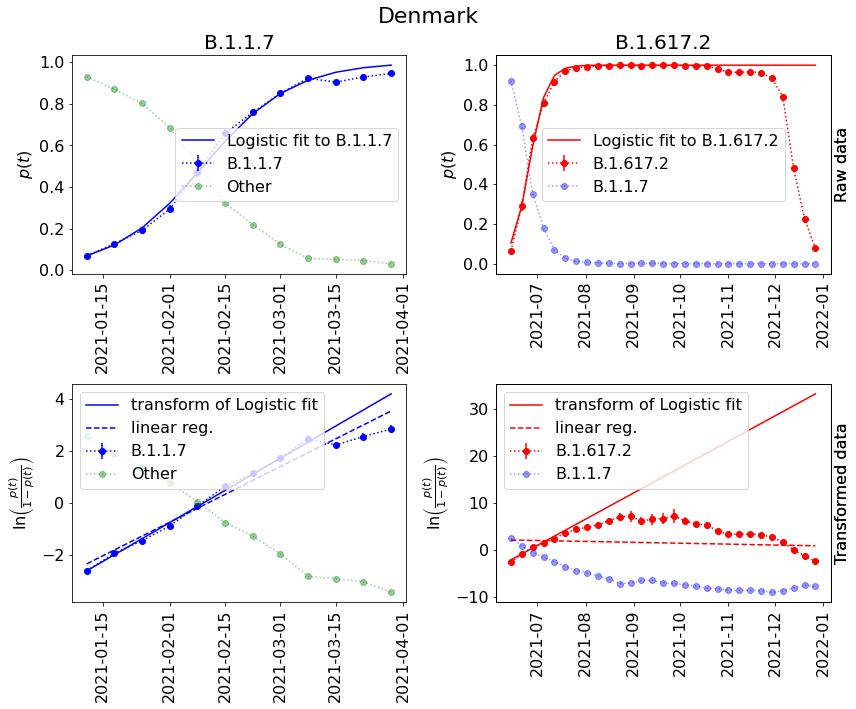

In [8]:
percent = "percent_variant_adjusted"

num_seq_df = df.loc[df.groupby(["country", "variant", "date"])["number_sequenced"].idxmax()].dropna()
filt_no_extremes = (num_seq_df[percent] != 0)&(num_seq_df[percent] != 1)
num_seq_df = num_seq_df.loc[filt_no_extremes]



for i,c in enumerate(countries):
    fig, axs = plt.subplots(2, len(variants), figsize=(6*len(variants), 5*2), tight_layout=True, sharex=False)
    #if len(np.shape(axs))!= 2:
    #    axs=np.array([axs]).transpose()
    for j,v in enumerate(variants):
        
        ## Data massage and selection
        # Filters window for percentages between 5 and 95, or closest data to this:
        if v == "B.1.1.7":
            time_filt = (num_seq_df.date < "2021-05-01")
        else:
            time_filt = (num_seq_df.date >= "2021-04-01")
        
        # Filtering for country and variant:
        cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==v)
        cv_filt = cv_filt&time_filt
        
        # Broadest possible filter: Find first non-zero element and max element of each variant to define window:
        start_filt_ext = (num_seq_df.loc[cv_filt].number_detections_variant != 0)
        stop_filt_ext = (num_seq_df.loc[cv_filt].percent_variant == num_seq_df.loc[cv_filt].percent_variant.max())

        w_start_ext = num_seq_df.loc[cv_filt&start_filt_ext].date.values[0]
        w_stop_ext = num_seq_df.loc[cv_filt&start_filt_ext].date.values[0]
        
        #print(time_filt)
        
        threshold = 20
        # start_filt = (num_seq_df.loc[cv_filt, percent] >= max(threshold, num_seq_df.loc[cv_filt, percent].min()))
        # stop_filt = (num_seq_df.loc[cv_filt, percent] >= min(1.-threshold, num_seq_df.loc[cv_filt, percent].max()))
        # include_filt = num_seq_df.loc[cv_filt&(stop_filt)]
        # include_filt = (np.divide(num_seq_df.loc[cv_filt, percent].apply(lambda x: 1/(x*(1-x))), num_seq_df.loc[cv_filt, "number_sequenced"]) <= threshold)
        include_filt = (num_seq_df.loc[cv_filt, percent].apply(lambda x: 1/(x*(1-x))) <= threshold)

        #print("-"*20)
        #print(c)
        #print(len(num_seq_df.loc[cv_filt&start_filt].date.values))
        #print(len(num_seq_df.loc[cv_filt&stop_filt].date.values))

        ##if len(num_seq_df.loc[cv_filt&start_filt].date.values)==0:
        ##    w_start = "2020-12-01"
        ##else:
        #w_start = num_seq_df.loc[cv_filt&start_filt].date.values[0]
        
        ##if len(num_seq_df.loc[cv_filt&stop_filt].date.values)==0:
        ##    w_stop = "2021-08-26"
        ##else:
        #w_stop = num_seq_df.loc[cv_filt&stop_filt].date.values[0]

        w_start = num_seq_df.loc[cv_filt&include_filt].date.values[0]
        w_stop = num_seq_df.loc[cv_filt&include_filt].date.values[-1]
        
        # Filtering for dates, defining window for data selection:
        date_filt = (num_seq_df.date >= w_start) & (num_seq_df.date <= w_stop)
        date_filt_ext = (num_seq_df.date >= w_start_ext) & (num_seq_df.date <= w_stop_ext)
        
        # Defining the data for plotting and fitting:
        X_data = num_seq_df.loc[cv_filt&date_filt, "date"]
        X_data_num = (pd.to_datetime(X_data.values) - pd.to_datetime(X_data.values[0])) / np.timedelta64(1,'D')
        
        Y_data_raw = num_seq_df.loc[cv_filt&date_filt, percent]
        Y_data_transf = Y_data_raw.apply(lambda y: np.log(y/(1-y)))
        
        Y_data_raw_err = num_seq_df.loc[cv_filt&date_filt, "err_"+percent]
        Y_data_transf_err = Y_data_raw.apply(lambda y: abs(1/(y*(1-y))))*num_seq_df.loc[cv_filt&date_filt, "err_"+percent]
        #Y_data_transf_err = Y_data_transf_err.apply(lambda x: x*x)
        
        suppl_v = suppl_variants[j]
        suppl_cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==suppl_v)
        suppl_X_data = num_seq_df.loc[suppl_cv_filt&date_filt, "date"]
        
        suppl_Y_data_raw = num_seq_df.loc[suppl_cv_filt&date_filt, percent]
        suppl_Y_data_transf = suppl_Y_data_raw.apply(lambda y: np.log(y/(1-y)))
        
        ext_X_data = num_seq_df.loc[cv_filt&date_filt_ext, "date"]
        ext_Y_data_raw = num_seq_df.loc[cv_filt&date_filt_ext, percent]
        ext_Y_data_transf = suppl_Y_data_raw.apply(lambda y: np.log(y/(1-y)))
        
        ## Fitting
        # performing logistic fitting procedure and plotting of fit:
        p0_init = [0.05, 0.003]
        popt_logis, pcov_logis = curve_fit(logistic_model, X_data_num, Y_data_raw, sigma=None, p0=p0_init, maxfev=1200)
        delta, p0 = popt_logis
        alpha_transf, beta_transf = delta, np.log(p0/(1-p0))
        
        # performing linear fitting procedure and plotting of fit:
        p0_init = None
        popt_lin, pcov_lin = curve_fit(lin_model, X_data_num, Y_data_transf, sigma=Y_data_transf_err, p0=p0_init, maxfev=1200)
        alpha, beta = popt_lin
        
        fit_results_df = fit_results_df.append({"country":c, "variant":v, "delta":delta, "p0":p0, 
                                                "alpha":alpha, "beta":beta, 
                                                "alpha_transf":alpha_transf, "beta_transf":beta_transf}, 
                                               ignore_index=True)

        ## Plotting
        # performing the dataplots and fit plots associated w a particular strain and country:
        axs[0][j].errorbar(X_data, Y_data_raw, yerr=2*Y_data_raw_err, marker="o", linestyle=":", color=v_col[v], label=f"{v}")
        axs[0][j].errorbar(suppl_X_data, suppl_Y_data_raw, marker="o", linestyle=":", color=v_col[suppl_v], alpha=0.4, label=f"{suppl_v}")
        # axs[0][j].errorbar(ext_X_data, ext_Y_data_raw, marker="o", linestyle=":", color=v_col[v], mec=v_col[v], mfc=None)
        
        #Logistic fit
        axs[0][j].plot(X_data, logistic_model(X_data_num, *popt_logis), color=v_col[v], label=f"Logistic fit to {v}")
        axs[0][j].tick_params(axis='x', labelrotation=90)
        axs[0][j].set_ylabel("$p(t)$")
        
        # linearizasion of data:
        axs[1][j].errorbar(X_data, Y_data_transf, yerr=2*Y_data_transf_err, marker="o", linestyle=":", color=v_col[v], label=f"{v}")
        axs[1][j].errorbar(suppl_X_data, suppl_Y_data_transf, marker="o", linestyle=":", color=v_col[suppl_v], alpha=0.4, label=f"{suppl_v}")
        # axs[1][j].errorbar(ext_X_data, ext_Y_data_transf, marker="o", linestyle=":", color=v_col[v], mec=v_col[v], mfc=None)
        
        # transform of logistic fit of raw data to best line of transformed data.
        lin_transf = lambda y: np.log(y/(1-y))
        axs[1][j].plot(X_data, lin_transf(logistic_model(X_data_num, *popt_logis)), color=v_col[v], label=f"transform of Logistic fit")
        
        # linear fit of transformed data
        #label_str = f"linear model $\\alpha x + \\beta$; $\\alpha=${round(alpha, 2)}, $\\beta=${round(beta, 2)}"
        label_str = f"linear reg."
        axs[1][j].plot(X_data, lin_model(X_data_num, *popt_lin), color=v_col[v], linestyle="--", label=label_str)

        ## Make residual plots!
        
        axs[1][j].tick_params(axis='x', labelrotation=90)
        axs[1][j].set_ylabel("$\\ln \\left( \\frac{p(t)}{1-p(t)} \\right)$")

        #axs[0][j].set_ylim(0,1)
        #axs[1][j].set_ylim(0,1)
        
        axs[0][j].legend()
        axs[1][j].legend()
        
        fig.suptitle(c)
        axs[0][j].set_title(v)
        
        ax2 = axs[0][-1].twinx()
        ax2.tick_params(right=False, labelright=False)
        ax2.set_ylabel("Raw data")
        
        ax2 = axs[1][-1].twinx()
        ax2.tick_params(right=False, labelright=False)
        ax2.set_ylabel("Transformed data")
        
        saveplt(f"data_fits_{c}")
        
#num_seq_df # .loc[(num_seq_df.country=="Denmark")&(num_seq_df.variant=="B.1.617.2")]

Relative rise in alpha:
0.1803668148087235
0.9018340740436174
2.0396629114932034	Denmark

2.0396629114932034 0.0


,country,variant,delta,p0,alpha,beta,alpha_transf,beta_transf
0,Denmark,B.1.1.7,0.088430,0.068932,0.076377,-2.334978,0.088430,-2.603207
1,Denmark,B.1.617.2,0.180367,0.104354,-0.006324,2.083430,0.180367,-2.149751


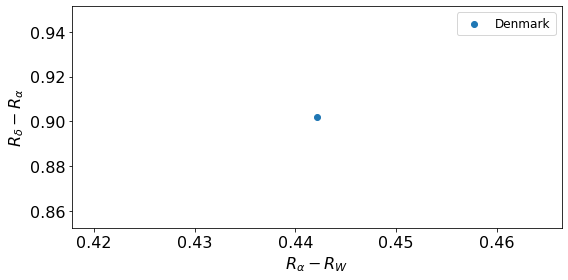

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)
print("Relative rise in alpha:")
relative_alphas = []
for c in countries:
    tmp_df = fit_results_df.loc[fit_results_df.country==c]#.reset_index()
    
    #These are absolute alphas, not absolute contactnumbers!
    alpha_new = tmp_df.loc[tmp_df.variant=="B.1.617.2"].reset_index().at[0, "alpha_transf"]
    alpha_old = tmp_df.loc[tmp_df.variant=="B.1.1.7"].reset_index().at[0, "alpha_transf"]
    
    R_old, R_new = alpha_old/nu, alpha_new/nu
    #R_old, R_new = alpha_old.apply(lambda x: x/nu), alpha_new/nu.apply(lambda x: x/nu)
    print(alpha_new)
    print(R_new)
    
    rel_alpha = alpha_new/alpha_old
    axs.scatter(R_old, R_new, label=c)
    axs.set_ylabel("$R_{\\delta}-R_{\\alpha}$")

    #rel_alpha = (alpha_new + alpha_old)/alpha_old
    #axs.scatter(R_old, R_new+R_old, label=c)
    #axs.set_ylabel("$R_{\\delta}-R_{nat}$")
    
    axs.set_xlabel("$R_{\\alpha}-R_{W}$")
    
    relative_alphas.append(rel_alpha)
    print(f"{rel_alpha}\t{c}")
    
    # axs[0].scatter(alpha_old, alpha_new, label=c)
    # axs[1].scatter(alpha_old, alpha_new - alpha_old, label=c)
    # axs[0].legend()
    # axs[1].legend()

axs.legend(fontsize=12, ncol=2)
saveplt("R_relations")

print()
avg = np.mean(relative_alphas) # sum(relative_alphas)/len(relative_alphas)
std = np.std(relative_alphas)
#print(sum(relative_alphas)/len(relative_alphas))
#print(sum(relative_alphas)/len(relative_alphas))
print(avg, std)
fit_results_df


array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

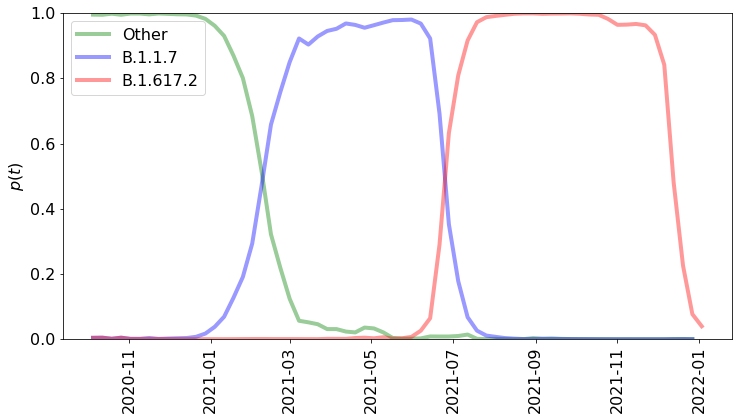

In [10]:
samp_df = df.loc[df.groupby(["country", "variant", "date"])["number_sequenced"].idxmax()].dropna()

fig, ax = plt.subplots(1,1, figsize=(12,6))
for j, c in enumerate(countries):
    for i, v in enumerate(["Other", "B.1.1.7", "B.1.617.2"]):
        tmp_df = samp_df.loc[(df.variant == v)&(df.country == c)]
        if j==0:
            ax.plot(tmp_df.date, tmp_df[percent], alpha=0.4, color=v_col[v], linewidth=4, label=v)
        else:
            ax.plot(tmp_df.date, tmp_df[percent], alpha=0.4, color=v_col[v], linewidth=4)

ax.set_ylabel("$p(t)$")
ax.legend()
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
saveplt("all_countries")

df.country.unique()

IndexError: index 1 is out of bounds for axis 0 with size 1

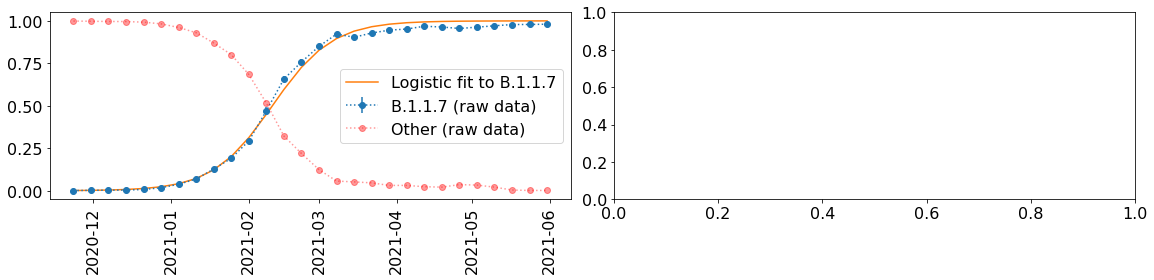

In [11]:
num_seq_df = df.loc[df.groupby(["country", "variant", "date"])["number_sequenced"].idxmax()].dropna()

fig, axs = plt.subplots(len(countries), len(variants), 
                        figsize=(8*len(variants), 4*len(countries)), 
                        tight_layout=True, sharex=False)

if len(np.shape(axs))!= 2:
    axs=np.array([axs]).transpose()

for i,c in enumerate(countries):
    for j,v in enumerate(variants):
        # Filtering for country and variant:
        cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==v)
        
        # Find first non-zero element and max element of each variant proportion, to define window:
        start_filt = (num_seq_df.loc[cv_filt].number_detections_variant != 0)
        stop_filt = (num_seq_df.loc[cv_filt].percent_variant == num_seq_df.loc[cv_filt].percent_variant.max())
        
        w_start = num_seq_df.loc[cv_filt&start_filt].date.values[0]
        w_stop = num_seq_df.loc[cv_filt&stop_filt].date.values[0]
        
        # Filtering for dates:
        date_filt = (num_seq_df.date > w_start) & (num_seq_df.date <= w_stop)

        #defining data for plotting and fitting:
        X_data = num_seq_df.loc[cv_filt&date_filt, "date"]
        X_data_num = (pd.to_datetime(X_data.values) - pd.to_datetime(X_data.values[0])) / np.timedelta64(1,'D')

        Y_data = num_seq_df.loc[cv_filt&date_filt, "percent_variant_adjusted"]
        Y_data_err = num_seq_df.loc[cv_filt&date_filt, "err_percent_variant_adjusted"]
        
        suppl_v = suppl_variants[j]
        suppl_cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==suppl_v)
        suppl_X_data = num_seq_df.loc[suppl_cv_filt&date_filt, "date"]
        suppl_Y_data = num_seq_df.loc[suppl_cv_filt&date_filt, "percent_variant_adjusted"]
        
        # performing fitting procedure and plotting of fit:
        p0 = [0.05, 0.003]
        popt, pcov = curve_fit(logistic_model, X_data_num, Y_data, sigma=Y_data_err, p0=p0, maxfev=1200)
        
        # performing the dataplots associated w a particular strain and country:
        axs[i][j].errorbar(X_data, Y_data, yerr=2*Y_data_err, 
                           marker="o", linestyle=":", label=f"{v} (raw data)")
        axs[i][j].errorbar(suppl_X_data, suppl_Y_data, 
                           marker="o", linestyle=":", color="red", alpha=0.4, label=f"{suppl_v} (raw data)")
        axs[i][j].plot(X_data, logistic_model(X_data_num, *popt), label=f"Logistic fit to {v}")
        
        axs[i][j].tick_params(axis='x', labelrotation=90)
        axs[i][j].legend()
        


for ax, v in zip(axs[0], variants):
    ax.set_title(v)
    
for ax, c in zip(axs[:,-1], countries):
    ax2 = ax.twinx() 
    ax2.tick_params(right=False, labelright=False)
    ax2.set_ylabel(c)

# num_seq_df.loc[(num_seq_df.country=="Norway")&(num_seq_df.variant=="B.1.617.2")]

In [ ]:
num_seq_df = df.loc[df.groupby(["country", "variant", "date"])["number_sequenced"].idxmax()].dropna()
filt_no_extremes = (num_seq_df["percent_variant"] != 0)&(num_seq_df["percent_variant"] != 1)
num_seq_df = num_seq_df.loc[filt_no_extremes]


lin_results_df = pd.DataFrame(columns=["country", "variant", "alpha", "beta"])

fig, axs = plt.subplots(len(countries), len(variants), figsize=(8*len(variants), 6*len(countries)), 
                        tight_layout=True, sharex=False)

if len(np.shape(axs))!= 2:
    axs=np.array([axs]).transpose()

for i,c in enumerate(countries):
    for j,v in enumerate(variants):
        # Filtering for country and variant:
        cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==v)
        
        # need to find first non-zero element and max element of each variant to define window:
        start_filt = (num_seq_df.loc[cv_filt].number_detections_variant != 0)
        stop_filt = (num_seq_df.loc[cv_filt].percent_variant == num_seq_df.loc[cv_filt].percent_variant.max())
        
        w_start = num_seq_df.loc[cv_filt&start_filt].date.values[0]
        w_stop = num_seq_df.loc[cv_filt&stop_filt].date.values[0]
        
        # print(w_start, w_stop, c)
        # Filtering for dates:
        date_filt = (num_seq_df.date > w_start) & (num_seq_df.date <= w_stop)
        
        #defining the data for plotting and fitting:
        X_data = num_seq_df.loc[cv_filt&date_filt, "date"]
        X_data_num = (pd.to_datetime(X_data.values) - pd.to_datetime(X_data.values[0])) / np.timedelta64(1,'D')
        
        Y_data_raw = num_seq_df.loc[cv_filt&date_filt, "percent_variant_adjusted"]
        Y_data = Y_data_raw.apply(lambda y: np.log(y/(1-y)))
        Y_data_err = abs(Y_data_raw.apply(lambda y: 1/(y*(1-y))))*num_seq_df.loc[cv_filt&date_filt, "err_percent_variant_adjusted"]
        
        suppl_v = suppl_variants[j]
        suppl_cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==suppl_v)
        
        suppl_X_data = num_seq_df.loc[suppl_cv_filt&date_filt, "date"]
        suppl_Y_data = num_seq_df.loc[suppl_cv_filt&date_filt, "percent_variant_adjusted"].apply(lambda y: np.log(y/(1-y)))
        
        # performing fitting procedure and plotting of fit:
        p0 = None #[0.05, 0.003]
        popt, pcov = curve_fit(lin_model, X_data_num, Y_data, sigma=Y_data_err, p0=p0, maxfev=1200)
        alpha, beta = popt
        lin_results_df = lin_results_df.append({"country":c, "variant":v, "alpha":alpha, "beta":beta}, ignore_index=True)
        label_str = f"linear model $\\alpha x + \\beta$; $\\alpha=${round(alpha, 2)}, $\\beta=${round(beta, 2)}"
        
        # performing the dataplots associated w a particular strain and country:
        axs[i][j].errorbar(X_data, Y_data, yerr=2*Y_data_err, 
                           marker="o", linestyle=":", label=f"{v}(transf. data)")
        axs[i][j].errorbar(suppl_X_data, suppl_Y_data, 
                           marker="o", linestyle=":", color="red", alpha=0.2, label=f"{suppl_v} (transf. data)")
        axs[i][j].plot(X_data, lin_model(X_data_num, *popt), label=label_str)
        
        axs[i][j].tick_params(axis='x', labelrotation=90)
        axs[i][j].legend(loc="best")

        
for ax, v in zip(axs[0], variants):
    ax.set_title(v)
    
for ax, c in zip(axs[:,-1], countries):
    ax2 = ax.twinx() 
    ax2.tick_params(right=False, labelright=False)
    ax2.set_ylabel(c)

#transform = lambda y: np.log(y/(1-y))
#print(transform(0.4))
    
#num_seq_df
# lin_results_df